# Full DL Solution
---
### **Case Study:** Stroke Prediction

**Objective:** The goal of this project is to walk you through a case study where you can apply the deep learning concepts that you learned about during the week. By the end of this project, you would have developed a solution that predicts if a person will have a stroke or not.


**Dataset Explanation:** We will be using the stroke dataset. Its features are:


* **id:** unique identifier
* **gender:** "Male", "Female" or "Other"
* **age:** age of the patient
* **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension
* **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
* **ever_married:** "No" or "Yes"
* **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
* **Residence_type:** "Rural" or "Urban"
* **avg_glucose_level:** average glucose level in blood
* **bmi:** body mass index
* **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
* **stroke:** 1 if the patient had a stroke or 0 if not

# Importing Libraries

We start by importing the libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Loading the Dataset

We load the dataset from a csv file, and see its first rows

In [97]:
path = 'healthcare-dataset-stroke-data.csv'
data = pd.read_csv(path)
data.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

# Exploratory Data Analysis

Now we start the exploratory data analysis.

### Shape of the data

First thing we need to know the shape of our data

**Question 1:** How many examples and features do we have?

In [122]:
 nrow = data.shape[0]
 ncol =data.shape[1]


 print(nrow, ncol)

5110 12


### Types of different Columns

**Question 2:** Check the type of each feature.

In [119]:

 data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


### Dealing with categorical variables

**Question 3:** Use the .value_counts() functions to walk through the categorical variables that we have to see the categories and the counts of each of them.

In [123]:
smoking_types = data ['smoking_status'].value_counts()
smoking_types

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [124]:
residence_types = data ['Residence_type'].value_counts()
residence_types

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

In [125]:
work_types = data ['work_type'].value_counts()
work_types

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [126]:
married_types = data ['ever_married'].value_counts()
married_types

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [127]:
hypertension = data ['hypertension'].value_counts()
hypertension

0    4612
1     498
Name: hypertension, dtype: int64

In [130]:
heart_disease= data  ['heart_disease'].value_counts()
heart_disease

0    4834
1     276
Name: heart_disease, dtype: int64

In [131]:
stroke= data ['stroke'].value_counts()
stroke

0    4861
1     249
Name: stroke, dtype: int64

# Preprocessing

### Dealing with Nulls

**Question 4:** The bmi column contains nulls. Fill it with the appropriate measure.

In [132]:
data['bmi'].fillna( value=data['bmi'] .mean(), inplace=True)

#### Encoding Categorical Features

**Question 5:** Here you have to encode those categorical variables to be able to use them to train your DL model.

In [135]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
data['smoking_status'] = encoder.fit_transform(data['smoking_status'])
data['Residence_type'] = encoder.fit_transform(data['Residence_type'])
data['work_type'] = encoder.fit_transform(data['work_type'])
data['ever_married'] = encoder.fit_transform(data['ever_married'])
data['gender'] = encoder.fit_transform(data['gender'])

### Normalizing Features

**Question 6:** Normalize the input data

In [136]:
data =data.divide(data.max(axis=0))
data.describe()

id       gender          age  hypertension  heart_disease  \
count  5110.000000  5110.000000  5110.000000   5110.000000    5110.000000   
mean      0.500656     0.207143     0.527154      0.097456       0.054012   
std       0.290125     0.246522     0.275764      0.296607       0.226063   
min       0.000919     0.000000     0.000976      0.000000       0.000000   
25%       0.243231     0.000000     0.304878      0.000000       0.000000   
50%       0.506334     0.000000     0.548780      0.000000       0.000000   
75%       0.749685     0.500000     0.743902      0.000000       0.000000   
max       1.000000     1.000000     1.000000      1.000000       1.000000   

       ever_married    work_type  Residence_type  avg_glucose_level  \
count   5110.000000  5110.000000     5110.000000        5110.000000   
mean       0.656164     0.541928        0.508023           0.390622   
std        0.475034     0.272573        0.499985           0.166643   
min        0.000000     0.000000        0.000000           0.202841   
25%        0.000000     0.500000        0.000000           0.284261   
50%        1.000000     0.500000        1.000000           0.338136   
75%        1.000000     0.750000        1.000000           0.419850   
max        1.000000     1.000000        1.000000           1.000000   

               bmi  smoking_status       stroke  
count  5110.000000     5110.000000  5110.000000  
mean      0.296037        0.458969     0.048728  
std       0.078873        0.357178     0.215320  
min       0.105533        0.000000     0.000000  
25%       0.243852        0.000000     0.000000  
50%       0.290984        0.666667     0.000000  
75%       0.336066        0.666667     0.000000  
max       1.000000        1.000000     1.000000

### Removing Unnecessary Features

**Question 7:** From the features that you have, remove the feature(s) that is(are) irrelevant to your predictions.

In [137]:
data = data.drop('id' , axis=1)

# Building the DL Model

**Question 8:** Now it's time to build the actual model, and observe a summary of it.

In [139]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential()
model.add(Dense(32, input_dim=10 , activation= 'relu'))
model.add(Dense(16 ,activation='relu'))
model.add(Dense(8 ,activation='relu'))
model.add(Dense(4 ,activation='relu'))
model.add(Dense(2 ,activation='relu'))
model.add(Dense(1 ,activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 32)                352       
                                                                 
 dense_19 (Dense)            (None, 16)                528       
                                                                 
 dense_20 (Dense)            (None, 8)                 136       
                                                                 
 dense_21 (Dense)            (None, 4)                 36        
                                                                 
 dense_22 (Dense)            (None, 2)                 10        
                                                                 
 dense_23 (Dense)            (None, 1)                 3         
                                                                 
Total params: 1065 (4.16 KB)
Trainable params: 1065 (4

### Compiling the model

**Question 9:**  Now we compile the model. Here we want to measure the accuracy as well as the precision and recall to know better about the performance of our model.

In [141]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy','precision','recall'])

### Fitting the model

**Question 10:** Split the data and train the model

We take the first columns as features and the last column as a label, then we split our dataset between training (70%) and testing (30%).

In [145]:
from sklearn.model_selection import train_test_split

x = data.iloc[:, :-1]
y = data.iloc[:, -1]
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.3, stratify=y)

we fit the model on 80% training data, and validate on the rest. Later we will do the final test on the test data. The training happens for 15 epochs.

In [156]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
218/219 [============================>.] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

# Improving DL Models

**Question 11:** Suggest ways to improve your model

### Checking For Data Imbalance

We check for imbalance because we have a poor recall and precision.

<Axes: >

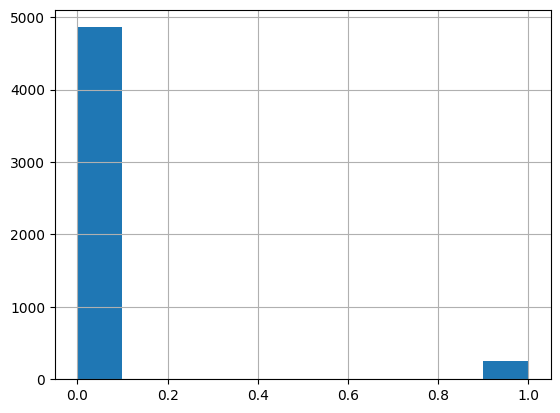

In [154]:
data['stroke'].hist()

We have a huge imbalance in the data, this is why we fix it with oversamppling and undersampling.

We will oversample this time using the SMOTE() function instead of random oversampling, and this is because SMOTE will generate new data based on the data that we have, so we avoid overfitting.

(array([4861.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        4861.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

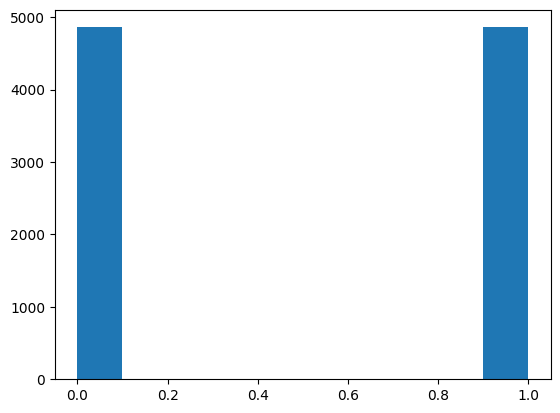

In [150]:
from imblearn.over_sampling import SMOTE
over = SMOTE()
x_new, y_new = over.fit_resample(x, y)
plt.hist([y_new])

Split the balanced dataset between 90% (training and validation), 10% testing
Then divide the 90% between 80% training and 20% validation

In [151]:
from sklearn.model_selection import train_test_split


x_train_val, x_test, y_train_val, y_test = train_test_split(x_new, y_new, test_size=0.1, stratify=y_new)
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=0.2, stratify=y_train_val)

Now we will train the model on the balanced data, and tune it on the validation set

In [158]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

Epoch 1/15
214/219 [============================>.] - ETA: 0s

ValueError: Unexpected result of `train_function` (Empty logs). This could be due to issues in input pipeline that resulted in an empty dataset. Otherwise, please use `Model.compile(..., run_eagerly=True)`, or `tf.config.run_functions_eagerly(True)` for more information of where went wrong, or file a issue/bug to `tf.keras`.

Evaluate your model on the test set that you kept aside at the beginning.

In [159]:
model.evaluate(x_test, y_test)

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1920, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


We see that the performance gets better when our data became balanced.
Now we will try improving our model with other techniques that we learned through the week.

### Model Design

We will introduce batch normalization after each layer and then train the model

In [113]:
from tensorflow.keras.layers import BatchNormalization
model = Sequential()

model.add(Dense(32, input_dim=10, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(16, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(8, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(4, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))

model.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 32)                352       
                                                                 
 batch_normalization_10 (Ba  (None, 32)                128       
 tchNormalization)                                               
                                                                 
 dense_13 (Dense)            (None, 16)                528       
                                                                 
 batch_normalization_11 (Ba  (None, 16)                64        
 tchNormalization)                                               
                                                                 
 dense_14 (Dense)            (None, 8)                 136       
                                                                 
 batch_normalization_12 (Ba  (None, 8)                

In [114]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy', 'Precision', 'Recall'])

history2 = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=15)

NameError: name 'x_train' is not defined

In [160]:
model.evaluate(x_test, y_test)

TypeError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2066, in test_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2049, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 2037, in run_step  **
        outputs = model.test_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1920, in test_step
        return self.compute_metrics(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1249, in compute_metrics
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 620, in update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/metrics_utils.py", line 77, in decorated
        result = update_state_fn(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 140, in update_state_fn
        return ag_update_state(*args, **kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/metrics/base_metric.py", line 723, in update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)

    TypeError: 'str' object is not callable


We see that we are achieving better metrics with batch normalization.